# Effect Size and Power

In [1]:
# pip install cohens_d 

In [2]:
# pip install CLES 

In [3]:
# import libraries 
import numpy as np 
import matplotlib.pyplot as plt 
plt.rcParams.update({'font.size': 16}) 
import scipy.stats as stats
import savingfigR as sf
import cohens_d as cD
import CLES as CL
from statsmodels.stats.power import TTestIndPower
from statsmodels.stats.power import TTestPower

## Cohen's D: 1 sample

In [4]:
data1 = np.array([13,14,15,17,18,19,21,20,19,20])
X = np.mean(data1)
s = np.std(data1, ddof=1)
mu = 15
d = (X - mu) / s
print(abs(d)) # report positive value

0.9431191251430155


In [5]:
cD.cohensd_1samp(data1, mu=mu)

0.9431191251430155

## Cohen's D: 2 sample

In [6]:
group1 = np.random.normal(loc=300.4, scale=34.9, size=(300,))
group2 = np.random.normal(loc=306.7, scale=30.1, size=(350,))
d2 = (np.mean(group1) - np.mean(group2)) / (np.sqrt((((len(group1) - 1) * np.var(group1, ddof=1)) + ((len(group2) - 1) * np.var(group2, ddof=2))) / (len(group1) + len(group2) - 2)))
print(abs(d2))

0.11109232047880643


In [7]:
cD.cohensd_2ind(group1=group1, group2=group2)

0.11109232047880643

## Cohen's D: Paired Samples 

In [8]:
data2a = np.array([22,25,17,24,16,29,20,23,19,20])
data2b = np.array([18,21,16,22,19,24,17,21,23,18])
data2diff = data2a - data2b
d2 = (np.mean(data2diff) - 0) / (np.sqrt(np.std(data2a, ddof=1)**2 + np.std(data2b,ddof=1)**2- 2 * stats.pearsonr(data2a,data2b)[0] * np.std(data2a, ddof=1) * np.std(data2b, ddof=1))/ np.sqrt(2*(1-stats.pearsonr(data2a,data2b)[0])))
print(d2)

0.4475410997133768


In [9]:
cD.cohensd_2paired(data2a, data2b)

0.4475410997133768

## Common Language Effect Size - 2 sample

In [10]:
a = np.array([1,3,5])
b = np.array([2,4,6])
total = 0
for A in a: 
    for B in b:
        if A > B:
            total += 1
        elif A == B: 
            total += 0.5
CLES = (abs(total / (len(a) * len(b)) - 0.5) + 0.5) * 100
print(CLES)

66.66666666666667


In [11]:
CL.CLES_2independent(a, b)

66.66666666666667

In [12]:
a = group1
b = group2
total = 0
for A in a:
    for B in b: 
        if A > B:
            total += 1 
        elif A == B:
            total += 0.5
CLES = (abs(total / (len(a) * len(b)) - 0.5) + 0.5) * 100
print(CLES)

53.85142857142857


In [13]:
CL.CLES_2independent(a, b)

53.85142857142857

## Common Language Effect Size - 1 sample 

In [14]:
a = data1 # data
b = np.ones_like(a)*15 # mean value you are comparing to (i.e., mu_0 = 15)
total = 0 
for A in a:
    for B in b:
        if A > B: 
            total += 1
        elif A == B: 
            total += 0.5
CLES = (abs(total / (len(a) * len(b)) - 0.5) + 0.5) * 100
print(CLES)

75.0


In [15]:
CL.CLES_1samp(a, 15)

75.0

## Common Language Effect Size - Paired 

In [16]:
a1 = data2a # e.g., pre intervention
a2 = data2b # e.g., post intervention
a = a2 - a1
b = np.zeros_like(a) # mean value you are comparing to (same as mu_0 = 0)
total=0
for A in a:
    for B in b:
        if A > B:
            total += 1
        elif A == B:
            total += 0.5
CLES = (abs(total / (len(a) * len(b)) - 0.5) + 0.5) * 100
print(CLES)

80.0


In [17]:
CL.CLES_2paired(a1, a2)

82.0

## Power Analysis (a priori) Cont'd

In [18]:
d2 = (300.4 - 306.7) / (np.sqrt((((300 - 1) * 34.9**2) + ((350 - 1) * 30.1**2)) / (300 + 350 - 2)))
d2abs = np.abs(d2)
pwrttest = TTestIndPower() # syntax is a bit weird here, it's an object that takes self as first argument, so create a new object
pwrttest.solve_power(effect_size=d2abs, alpha=0.05, power=0.8)

416.23548062417126

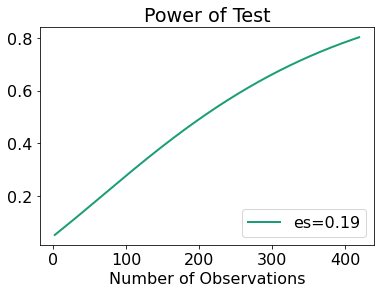

In [19]:
fig = plt.figure()
ax = plt.subplot(1,1,1) # this syntax is also a bit odd, but it needs the axes or it wont work
fig = pwrttest.plot_power(dep_var='nobs', nobs=np.arange(2, 420), effect_size=np.array([d2abs]), ax=ax)
plt.show()

sf.best_save(fig, 'power1')

## Power Analysis (Pilot Data) Cont'd

In [20]:
data1 = np.array([13,14,15,17,18,19,21,20,19,20])
d1 = cD.cohensd_1samp(data1, mu=15)
pwrttest1 = TTestPower()
pwrttest1.solve_power(effect_size=d1,alpha=0.05, power=0.8)

10.89890000254771

In [21]:
pwrttest1_1 = TTestPower()
pwrttest1_1.solve_power(effect_size=d1, nobs=10, alpha=0.05)

0.756329564722745

## Numerical Power Analysis (a priori) Cont'd

In [22]:
PVALUES1 = np.zeros((100000,)) # initialize NaN array
n = 100
for i in range(len(PVALUES1)): 
    group1 = np.random.normal(loc=300.4, scale=34.9, size=(n,))
    group2 = np.random.normal(loc=306.7, scale=30.1, size=(n,))
    pval = stats.ttest_ind(group1, group2)[1]
    PVALUES1[i] = pval

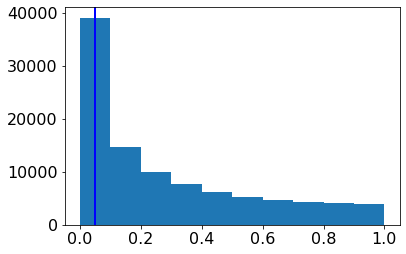

In [23]:
fig = plt.figure()
plt.hist(PVALUES1)
plt.axvline(0.05, c='b', lw=2)
plt.show()

sf.best_save(fig, 'NPA_curve')

In [24]:
np.sum(PVALUES1 < 0.05) / len(PVALUES1) * 100

27.555000000000003